# Datafolio

Para acceder a los datos que se desean analizar consulte  el siguiente [enlace.](https://datacatalog.worldbank.org/dataset/world-development-indicators) (Data & Resources)

In [47]:
#Importando librerías que tal vez pueda utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import ipywidgets as widgets
from ipywidgets import interact
import math
warnings.filterwarnings("ignore")  # Elimina las advertencias

El archivo `WDIData` contiene información de muchos indicadores de los países y regiones del mundo desde el año 1960, es notable que hay una gran cantidad de datos `NaN` ya que no ha sido posible recolectar la misma información en todos los países de igual manera.

El documento `WDISeries` contiene información más detallada del indicador presente en el archivo `WDIData`.

En la tabla `WDICountry` se muestra información relevante de cada uno de los países.

# Ejercicio 1

Haga una lista de todos los temas ('Topic') que hay en el archivo   `WDISeries`, seleccione un sub-tema, por ejemplo, el tema general puede ser 'Environment' y el sub-tema 'Land use' y agregue una columna a `WDISeries` cuyo valor sea el sub-tema elegido, si no es del sub-tema elegido ponga el valor `NaN`.

In [3]:
# Subtema=
dfs=pd.read_csv('WDISeries.csv')
dfs['Subtema']=np.where(dfs['Topic']=='Infrastructure: Communications', 'Infrastructure: Communications' ,None)
dfs

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Subtema
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,None
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,None
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,None
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,None
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,VC.IDP.NWDS,Public Sector: Conflict & fragility,"Internally displaced persons, new displacement...",NaN,Internally displaced persons are defined accor...,NaN,Annual,NaN,NaN,Sum,...,NaN,The Internal Displacement Monitoring Centre (h...,"Internally displaced persons are ""persons or g...",Although all persons affected by conflict and/...,NaN,NaN,NaN,CC BY-4.0,NaN,None
1430,VC.IDP.TOCV,Public Sector: Conflict & fragility,"Internally displaced persons, total displaced ...",NaN,Internally displaced persons are defined accor...,NaN,Annual,NaN,NaN,Sum,...,NaN,The Internal Displacement Monitoring Centre (h...,"Internally displaced persons are ""persons or g...",Although all persons affected by conflict and/...,NaN,NaN,NaN,CC BY-4.0,NaN,None
1431,VC.IHR.PSRC.FE.P5,Public Sector: Conflict & fragility,"Intentional homicides, female (per 100,000 fem...",NaN,"Intentional homicides, female are estimates of...",NaN,Annual,NaN,NaN,NaN,...,NaN,UN Office on Drugs and Crime's International H...,The definitions used to produce data are in li...,"In some regions, organized crime, drug traffic...",NaN,NaN,NaN,CC BY-4.0,NaN,None
1432,VC.IHR.PSRC.MA.P5,Public Sector: Conflict & fragility,"Intentional homicides, male (per 100,000 male)",NaN,"Intentional homicides, male are estimates of u...",NaN,Annual,NaN,NaN,NaN,...,NaN,UN Office on Drugs and Crime's International H...,The definitions used to produce data are in li...,"In some regions, organized crime, drug traffic...",NaN,NaN,NaN,CC BY-4.0,NaN,None


# Ejercicio 2
Cree una nueva base de datos que contenga el histórico de todos los sucesos de su sub-tema por países y regiones. Llámela `sub-tema_df`. Trate esta nueva base de datos para que sea más legible y limpie, de ser necesario, la base.

In [4]:
df_WDI_Data=pd.read_csv('WDIData.csv')
df_WDI_Data=df_WDI_Data.drop('Unnamed: 65', axis=1)
lista_columns=df_WDI_Data.columns
lista_columns_titles=lista_columns[0:4]
lista_columns_unpivot= lista_columns[4:]
df_unpivot=pd.melt(df_WDI_Data, id_vars=lista_columns_titles, value_vars=lista_columns_unpivot, var_name='Año', value_name='Valor')
df_unpivot=df_unpivot[df_unpivot.Valor.notna()]

In [5]:
sub_tema_df=dfs[dfs.Subtema.notna()]

sub_tema_df=df_unpivot.merge(sub_tema_df,left_on='Indicator Code', right_on='Series Code')
dfcountry_series=pd.read_csv('WDICountry.csv')
sub_tema_df=sub_tema_df.merge(dfcountry_series,left_on='Country Code', right_on='Country Code')
sub_tema_df=sub_tema_df.drop(['Short definition','Unit of measure','Base Period','Other notes','Notes from original source','Related source links','Other web links'
                             ,'Related indicators','Unnamed: 20','PPP survey year','Unnamed: 30'], axis=1)
sub_tema_df

,Country Name,Country Code,Indicator Name_x,Indicator Code,Año,Valor,Series Code,Topic,Indicator Name_y,Long definition,...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1960,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
1,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1965,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
2,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1970,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
3,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1975,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
4,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1976,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90072,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2015,4.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0
90073,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2016,12.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0
90074,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2017,9.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0
90075,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2018,11.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0


# Ejercicio 3
Divida la base de datos resultante del ejercicio anterior en dos, `sub-tema_C_df` y `sub-tema_R_df`, la primera tendrá la información por países y la segunda por regiones.

*Ayuda:* Use el archivo `WDICountry`para hacer la separación adecuada, la columna 'Regions' será de gran utilidad.

In [6]:
sub_tema_df.columns
sub_tema_df['Indicator Name_x'].unique()
# sub-tema_C_df=sub_tema_df

array(['Mobile cellular subscriptions',
       'Mobile cellular subscriptions (per 100 people)',
       'Fixed telephone subscriptions',
       'Fixed telephone subscriptions (per 100 people)',
       'Individuals using the Internet (% of population)',
       'ICT service exports (% of service exports, BoP)',
       'ICT service exports (BoP, current US$)',
       'Fixed broadband subscriptions',
       'Fixed broadband subscriptions (per 100 people)',
       'ICT goods exports (% of total goods exports)',
       'ICT goods imports (% total goods imports)',
       'Secure Internet servers (per 1 million people)',
       'Secure Internet servers'], dtype=object)

# Ejercicio 4
La base de datos aún conserva valores un poco difíciles de leer, remplace los valores de la columna 'Indicator code' por una descripción un poco más amena para el lector. 

In [7]:
# indicator Name
sub_tema_df

,Country Name,Country Code,Indicator Name_x,Indicator Code,Año,Valor,Series Code,Topic,Indicator Name_y,Long definition,...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1960,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
1,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1965,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
2,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1970,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
3,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1975,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
4,Arab World,ARB,Mobile cellular subscriptions,IT.CEL.SETS,1976,0.0,IT.CEL.SETS,Infrastructure: Communications,Mobile cellular subscriptions,Mobile cellular telephone subscriptions are su...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90072,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2015,4.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0
90073,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2016,12.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0
90074,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2017,9.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0
90075,St. Martin (French part),MAF,Secure Internet servers,IT.NET.SECR,2018,11.0,IT.NET.SECR,Infrastructure: Communications,Secure Internet servers,"The number of distinct, publicly-trusted TLS/S...",...,NaN,NaN,NaN,2015,NaN,NaN,Yes,NaN,NaN,2015.0


# Ejercicio 5
Es aquí donde su creatividad será puesta a prueba, pues ya tiene una base de datos en buenas condiciones para representar gráficamente muchísima información, pero no se cohiba, si quiere puede agregar más columnas de los demás archivos para hacer más y graficos más específicos.

*Sugerencia:* Grafique la distribución de las variables obtenidas, el comparativo entre regiones, como también entre los países que más aportan, las diferencias entre los países con ingresos altos medios y bajos, no se le sugiere más porque usted debe ser el creativo.

Recuerde la información debe ser relevante, fácil de leer y puede emplear las diferentes librerías vistas hasta ahora para hacer de su datafolio el mejor.

In [154]:
def grafica_año(data,tema,Año_min,Año_max,Grupo_ingresos):
    sub_tema_df_cel=data
    sub_tema_df_cel=sub_tema_df[(sub_tema_df['Indicator Name_x']==tema)&(sub_tema_df['Income Group'].isin(Grupo_ingresos))]
    df_indi_año=sub_tema_df_cel.groupby(['Año'])['Valor'].sum().astype('int64').reset_index(name='Total')
    df_indi_año['Año']=(df_indi_año['Año'].astype(int))
    df_indi_año['Año_1']=df_indi_año['Año'].astype(int)+1
    df_indi_año=df_indi_año[['Año','Total']].merge(df_indi_año[['Año_1','Total']],left_on='Año',right_on='Año_1')
    df_indi_año=df_indi_año[['Año','Total_x','Total_y']]
    df_indi_año['Percent']=((df_indi_año['Total_x']/df_indi_año['Total_y'] -1)*100).astype(float).round(1)
    df_indi_año=df_indi_año[df_indi_año['Percent']!=np.inf]
    df_indi_año=df_indi_año[df_indi_año.Percent.notna()]
    df_indi_año=df_indi_año[ (df_indi_año['Año']>=Año_min) & (df_indi_año['Año']<=Año_max)]
    df_indi_año['Año']=df_indi_año['Año'].astype(str)
    plt.figure(figsize=(40,50))
    plt.subplot(4,1,1)
    vals=df_indi_año['Año'].tolist()
    hist=df_indi_año['Percent'].tolist()
    plt.bar(vals, hist)
    plt.plot(vals, hist,'k',marker='o')
    plt.grid(True)
    for i in range(len(vals)):
      porcentaje=str(hist[i])+'%'
      plt.text(vals[i], 
             hist[i], 
             f'{porcentaje}',
             horizontalalignment='center',
             bbox=dict(facecolor='yellow', alpha=0.7),
             fontsize=8,
             color = 'blue',
             fontweight = 'bold')
    

def grafica_region(data,tema,Año_min,Año_max,Grupo_ingresos):
    sub_tema_df_cel=data
    sub_tema_df_cel=sub_tema_df[(sub_tema_df['Indicator Name_x']==tema)&(sub_tema_df['Income Group'].isin(Grupo_ingresos))]
    sub_tema_df_cel['Año']=sub_tema_df_cel['Año'].astype(int)
    sub_tema_df_cel=sub_tema_df_cel[(sub_tema_df_cel['Año']>=Año_min)&(sub_tema_df_cel['Año']<=Año_max)]
    df_indi_año=sub_tema_df_cel.groupby(['Region'])['Valor'].sum().astype('int64').reset_index(name='Total')
#     plt.figure(figsize=(40,20))
    plt.subplot(4,1,2)
    vals=df_indi_año['Region'].tolist()
    hist=df_indi_año['Total'].tolist()
    plt.bar(vals, hist)
    plt.plot(vals, hist,'k',marker='o')
    plt.grid(True)
    for i in range(len(vals)):
      porcentaje=str(hist[i])
      plt.text(vals[i], 
             hist[i], 
             f'{porcentaje}',
             horizontalalignment='center',
             bbox=dict(facecolor='yellow', alpha=0.7),
             fontsize=12,
             color = 'blue',
             fontweight = 'bold')
    

##########Top 10 pais por nivel de ingresos y por año
def top_10_pais(sub_tema_df,Año_min,Año_max,tema,in_group):
    sub_tema_df_cel=sub_tema_df[sub_tema_df['Indicator Name_x']==tema]
    sub_tema_df_cel['Año']=sub_tema_df_cel['Año'].astype(int)
    df_indi_año=sub_tema_df_cel.groupby(['Country Name','Region','Año','Income Group'])['Valor'].sum().astype('int64').reset_index(name='Total')
    df_indi_año=df_indi_año[(df_indi_año['Año']>=Año_min)&(df_indi_año['Año']<=Año_max)]
    df_indi_año=df_indi_año[(df_indi_año['Income Group'].isin(in_group))]
    df_indi_año=df_indi_año.groupby(['Country Name'])['Total'].sum().astype('int64').reset_index(name='Total').sort_values(by='Total', ascending=False).head(10)
#     plt.figure(figsize=(40,20))
    plt.subplot(4,1,3)
    vals=df_indi_año['Country Name'].tolist()
    hist=df_indi_año['Total'].tolist()
    plt.bar(vals, hist)
    plt.plot(vals, hist,'k',marker='o')
    plt.grid(True)
    for i in range(len(vals)):
      porcentaje=str(hist[i])
      plt.text(vals[i], 
             hist[i], 
             f'{porcentaje}',
             horizontalalignment='center',
             bbox=dict(facecolor='yellow', alpha=0.7),
             fontsize=12,
             color = 'blue',
             fontweight = 'bold')
    
#     plt.show()

    
def top_10_pais_menor(sub_tema_df,Año_min,Año_max,tema,in_group):
    sub_tema_df_cel=sub_tema_df[sub_tema_df['Indicator Name_x']==tema]
    sub_tema_df_cel['Año']=sub_tema_df_cel['Año'].astype(int)
    df_indi_año=sub_tema_df_cel.groupby(['Country Name','Region','Año','Income Group'])['Valor'].sum().astype('int64').reset_index(name='Total')
    df_indi_año=df_indi_año[(df_indi_año['Año']>=Año_min)&(df_indi_año['Año']<=Año_max)]
    df_indi_año=df_indi_año[(df_indi_año['Income Group'].isin(in_group))]
    df_indi_año=df_indi_año.groupby(['Country Name'])['Total'].sum().astype('int64').reset_index(name='Total').sort_values(by='Total', ascending=True).head(10)
#     plt.figure(figsize=(40,20))
    plt.subplot(4,1,4)
    vals=df_indi_año['Country Name'].tolist()
    hist=df_indi_año['Total'].tolist()
    plt.bar(vals, hist)
    plt.plot(vals, hist,'k',marker='o')
    plt.grid(True)
    for i in range(len(vals)):
      porcentaje=str(hist[i])
      plt.text(vals[i], 
             hist[i], 
             f'{porcentaje}',
             horizontalalignment='center',
             bbox=dict(facecolor='yellow', alpha=0.7),
             fontsize=12,
             color = 'blue',
             fontweight = 'bold')
    
#     plt.show()


In [150]:
Tema=widgets.Dropdown(
    options= list(sub_tema_df['Indicator Name_x'].unique()),
    value='Mobile cellular subscriptions',
    description='Tema:',
    disabled=False,
)

Grupo_ingresos=widgets.RadioButtons(
    options= ['All'] +list(sub_tema_df[sub_tema_df['Income Group'].notnull()]['Income Group'].sort_values().unique()),
    value='Low income',
    description='G. Ingresos:',
    disabled=False,
)

Año=widgets.IntRangeSlider(
    value=[min(list(sub_tema_df['Año'].sort_values().unique())), max(list(sub_tema_df['Año'].sort_values().unique()))],
    min=min(list(sub_tema_df['Año'].sort_values().unique())),
    max=max(list(sub_tema_df['Año'].sort_values().unique())),
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)





def plotit(Año,Tema,Grupo_ingresos):
    if Grupo_ingresos=='All':
        Grupo_ingresos=['High income','Low income','Lower middle income','Upper middle income']
    else:
        Grupo_ingresos=[Grupo_ingresos]
    Año_min=Año[0]
    Año_max=Año[1]

    grafica_año(sub_tema_df,Tema,Año_min,Año_max,Grupo_ingresos)
    grafica_region(sub_tema_df,Tema,Año_min,Año_max,Grupo_ingresos)
    top_10_pais(sub_tema_df,Año_min,Año_max,Tema,Grupo_ingresos)
    top_10_pais_menor(sub_tema_df,Año_min,Año_max,Tema,Grupo_ingresos)
    
    

In [155]:
interact(plotit,Año=Año,Tema=Tema,Grupo_ingresos=Grupo_ingresos)

interactive(children=(IntRangeSlider(value=(1960, 2020), continuous_update=False, description='Test:', max=202…

<function __main__.plotit(Año, Tema, Grupo_ingresos)>

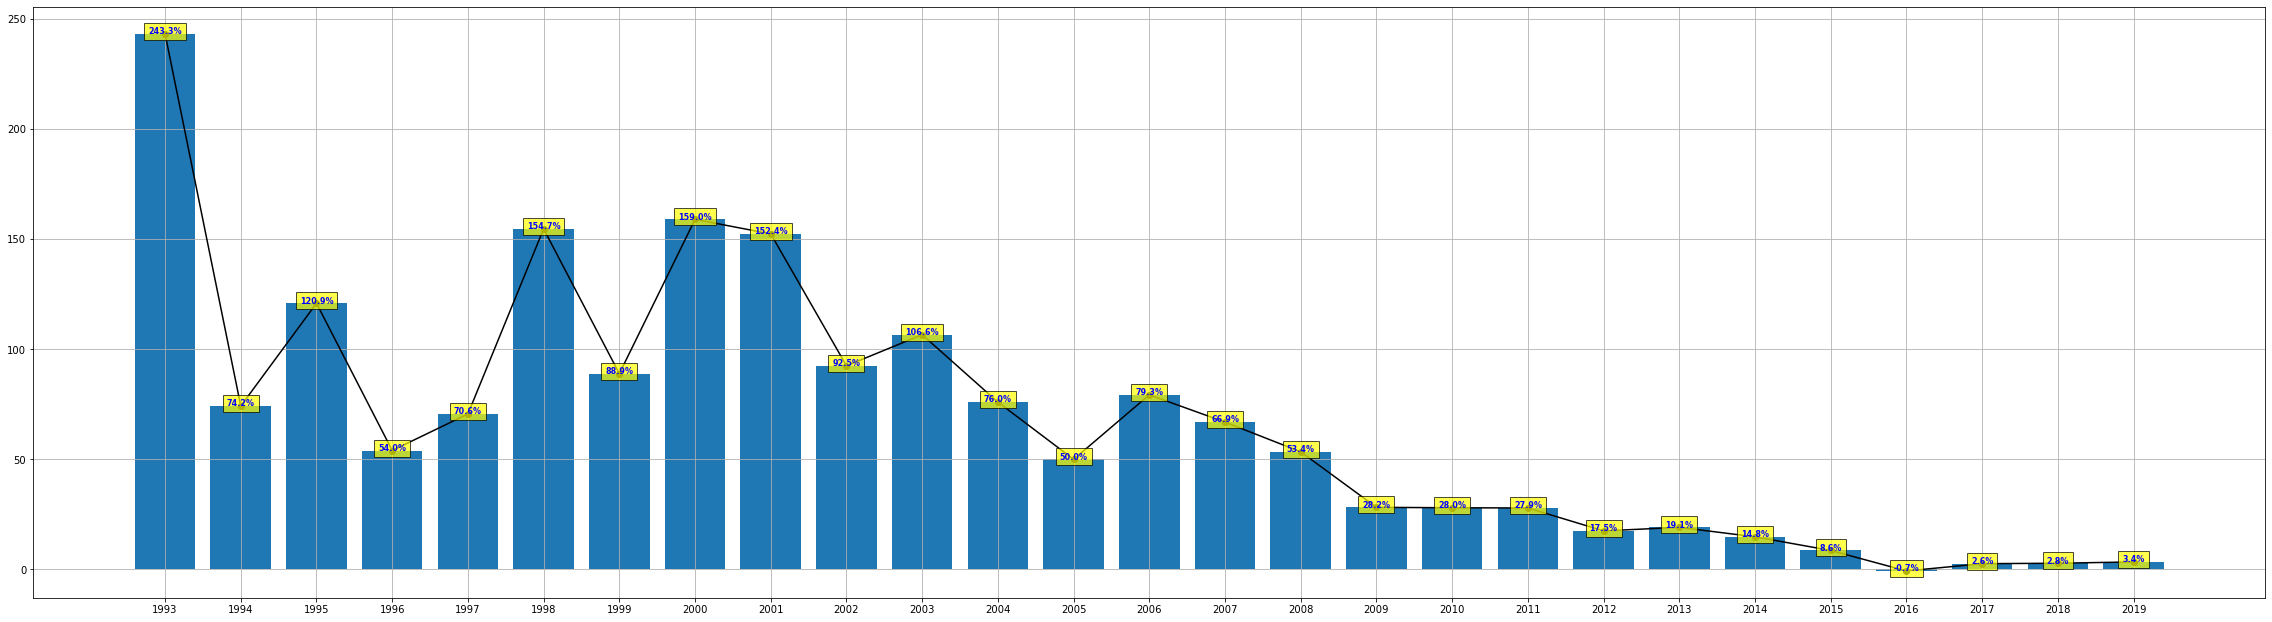

In [159]:
 grafica_año(sub_tema_df,tema='Mobile cellular subscriptions',Año_min=1980,Año_max=2020,Grupo_ingresos=['Low income'])

# Observaciones:
El datafolio debe:
```
- Enfatizar la narración y visualización de datos sobre la explicación con mucho texto.
- Ser de fácil lectura para la audiencia  y debe dar a entender rápidamente la esencia del trabajo.
- Ser atractivo y accesible para audiencias 'no técnicas'.
```